In [ ]:
# VGG working
from torchvision import models
import torchvision.transforms.v2 as tfs_v2
from PIL import Image
import torch


vgg_weigths = weights=models.VGG16_Weights.DEFAULT
cats = vgg_weigths.meta['categories']
transforms  = vgg_weigths.transforms()

# or transforms can be done that way
transforms_v1  = tfs_v2.Compose([
    tfs_v2.ToImage(),
    tfs_v2.Resize(256),
    tfs_v2.CenterCrop(224),
    tfs_v2.ToDtype(dtype=torch.float32),
    tfs_v2.Normalize(mean=[0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])


img = Image.open('datasets\\vgg\\image003.jpg').convert('RGB')
img_net = transforms(img).unsqueeze(0)

model = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
model.eval()
p = model(img_net).squeeze()

res = p.softmax(dim=0).sort(descending=True)
# print(model)

for s, i in zip(res[0][:5], res[1][:5]):
    print(f"{cats[i]}: {s:.4f}")


sports car: 0.9484
racer: 0.0353
convertible: 0.0088
car wheel: 0.0054
passenger car: 0.0005


In [16]:
# 5
import torch
import torchvision.transforms.v2 as tfs
import torch.nn as nn

from PIL import Image
import torch

C = 3
img_pil = tfs.ToPILImage('RGB')(torch.Tensor(torch.rand((C, 400, 400)) * 256))


# здесь продолжайте программу
model = nn.Sequential(
    nn.Conv2d(3, 64, 3, stride=1, padding=1, bias=True),
    nn.ReLU(inplace=True),
    nn.Conv2d(64, 64, 3, stride=1, padding=1, bias=True),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(2,stride=2),
    nn.Conv2d(64,128, 3, stride=1, padding=1, bias=True),
    nn.ReLU(inplace=True),
    nn.Conv2d(128,128,3,stride=1,padding=1,bias=True),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(2, stride=2)
)

transforms = tfs.Compose([
    tfs.ToImage(),
    tfs.Resize(224),
    tfs.ToDtype(dtype=torch.float32),
     ])

img = transforms(img_pil)
out = model(img)

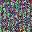

(32, 32)


In [1]:
# 6
import torch
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim


# @title Неправильная генерация объекта ds
import torch
import torch.utils.data as data
from PIL import Image # для тестовой картинки

ds = lambda: None # Создаем пустой объект
ds.data = torch.rand((256, 1, 32, 32)) * 256
ds.target = torch.randint(0, 2, (256,)).float()

# Проверка картинки
img_pil = Image.fromarray(ds.data[0][0].numpy(), 'RGB')
display(img_pil)
print(img_pil.size)

# здесь продолжайте программу
# model = nn.Sequential([
#     nn.Conv2d(1,32, 5, stride=1,padding=2, bias=True),
#     nn.ReLU(inplace=True),
#     nn.MaxPool2d(2, stride=2),
#     nn.Conv2d(32,16, 3, stride=1, padding=1, bias=True),
#     nn.ReLU(inplace=True),
#     nn.MaxPool2d(2,stride=2),
#     nn.Flatten(),
#     nn.Linear(1024,1)
# ])
